#  Sales Analysis

### Import necessary libraries updated them if needed
> Numpy - Matplotlib - Pandas - Seaborn - Operating System

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step One: Collect Data 

#### Merge data of each month into one CSV
In the given folder (Sales Data), you will find a group of csv files. Merge them in one data frame, then save them in a separate csv file

In [2]:
# get data file names
filenames = glob.glob('sales_data' + "/*.csv")

dfs = []

for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [3]:
# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

### Read the updated dataframe

In [4]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Investigating the Data
Read the itemdescription.txt to understand the given data.

Explore the data and comment on it

In [5]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Comment on the Data

### `All columns are in Object format >>> error in performing any operation`

## Preparing and Cleaning up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

In [6]:
from datetime import datetime, date

In [7]:
df.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   545
dtype: int64

In [8]:
df_new = df.copy()

In [9]:
### dropna

df_new.dropna(axis=0, inplace=True)

###

df_new.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [11]:
## modify col types

df_new['Price Each'] = pd.to_numeric(df_new['Price Each'], errors='coerce')
df_new['Quantity Ordered'] = pd.to_numeric(df_new['Quantity Ordered'], errors='coerce')

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


In [13]:
df_new['Order Date']  

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
dtypes: float64(2), object(4)
memory usage: 9.9+ MB


In [15]:
df_new.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               185950
                   True              True        False       False                  355
dtype: int64

In [16]:
df_new.dropna(axis=0, inplace=True)

In [17]:
### parse date
df_new['Order Date']  = pd.to_datetime(df_new['Order Date'], format='%m/%d/%y %H:%M')

## Data Exploration!

* Question 1: What was the best month for sales? How much was the total sales in that month? (Analatically and graphically)
* Question 2: Which city have sold the most products?
* Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
* Question 4: What products are most often sold together? (Bonus)
* Question 5: What product sold the most? Why do you think it sold the most?

> Comment on each result

#### Question 1: What was the best month for sales? How much was earned that month? (Analatically and graphically)
Draw a bar chart that can idicate the month with the higest (in green) and lowest sales (in red)
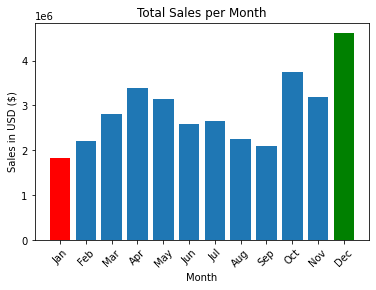

### Q:1

In [18]:
df_new['month_new'] = df_new['Order Date'].dt.month
df_new['total_price'] = df_new['Quantity Ordered'] * df_new['Price Each']

df_new['month_new'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10], dtype=int64)

In [19]:
## analytical

total_price_each_month = df_new.groupby(['month_new'])['total_price'].sum()

month_max = np.argmax(total_price_each_month) + 1

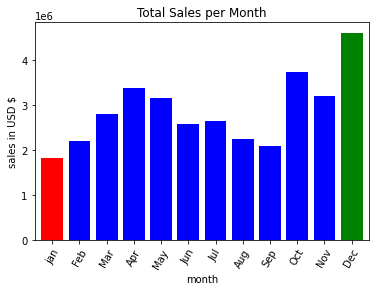

In [20]:
### plotting

color_list = ['r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'g']

total_price_each_month.plot.bar(color=color_list, width=0.8)
plt.xlabel('month')
plt.ylabel('sales in USD $')
plt.title('Total Sales per Month')

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11], 
           ['jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
           rotation=60);

plt.show()

### ` max month in total price is (12)`

#### Question 2: What city sold the most product?

In [21]:
import re

In [22]:
city_extract = pd.DataFrame(df_new['Purchase Address']).reset_index()
city_extract.drop(columns=['index'], axis=1, inplace=True)

In [23]:
city_extract

,Purchase Address
0,"917 1st St, Dallas, TX 75001"
1,"682 Chestnut St, Boston, MA 02215"
2,"669 Spruce St, Los Angeles, CA 90001"
3,"669 Spruce St, Los Angeles, CA 90001"
4,"333 8th St, Los Angeles, CA 90001"
...,...
185945,"840 Highland St, Los Angeles, CA 90001"
185946,"216 Dogwood St, San Francisco, CA 94016"
185947,"220 12th St, San Francisco, CA 94016"
185948,"511 Forest St, San Francisco, CA 94016"


In [24]:
city_extract.iloc[0].values[0]

'917 1st St, Dallas, TX 75001'

In [25]:
re.split(r',\s', city_extract.iloc[400].values[0])[1]

'Portland'

In [26]:
cities_list = []

for i in range(len(city_extract)):
    cities_list.append(re.split(r',\s', city_extract.iloc[i].values[0])[1])

In [27]:
df_new['cities_extract'] = cities_list
df_new

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_new,total_price,cities_extract
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


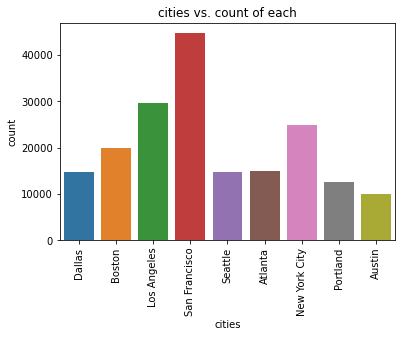

In [28]:
sns.countplot(x='cities_extract', data=df_new)
plt.xticks(rotation=90)
plt.xlabel('cities')
plt.title('cities vs. count of each')
plt.show()

### ` San Francisco sold the Most products in General`

In [29]:
df_new.groupby(['cities_extract', 'Product'])['Quantity Ordered'].count()

cities_extract  Product               
Atlanta         20in Monitor               338
                27in 4K Gaming Monitor     492
                27in FHD Monitor           584
                34in Ultrawide Monitor     478
                AA Batteries (4-pack)     1661
                                          ... 
Seattle         ThinkPad Laptop            333
                USB-C Charging Cable      1704
                Vareebadd Phone            179
                Wired Headphones          1509
                iPhone                     545
Name: Quantity Ordered, Length: 171, dtype: int64

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
Plot the number of purchase orders done in every hour and mark the higest hour

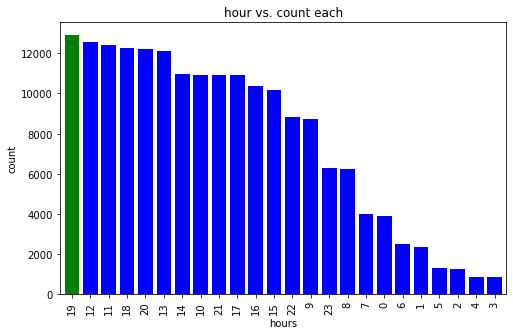

In [30]:
df_new['hour'] = df_new['Order Date'].dt.hour


### plotting using pandas

color_list = ['g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 
              'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

plt.figure(figsize=(8,5))
df_new['hour'].value_counts().plot.bar(width=0.8, color=color_list)
plt.xlabel('hours')
plt.ylabel('count')
plt.title('hour vs. count each')
plt.show()

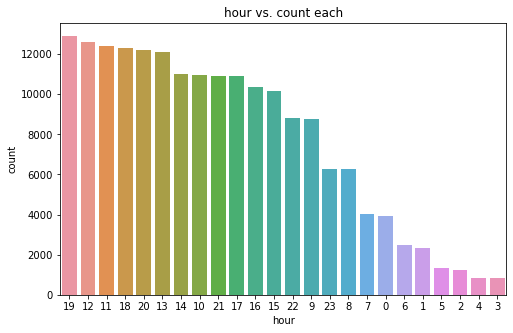

In [31]:
### plotting using seaborn

plt.figure(figsize=(8,5))
plt.title('hour vs. count each')
sns.countplot(x='hour', data=df_new, order = df_new['hour'].value_counts().index);

### ` Hour number (19) : 7 pm is the maximum one `

#### Question 4: What products are most often sold together?

In [32]:
df_new['Order ID'] = pd.to_numeric(df_new['Order ID'], errors='coerce')

In [33]:
idx_count = df_new['Order ID'].value_counts()[:20]  ## choose for example 20 

In [34]:
idx_count.index

Int64Index([160873, 312407, 194253, 296353, 277875, 193511, 289117, 226625,
            295681, 312462, 263918, 212334, 178158, 242936, 235798, 304802,
            165665, 196615, 297256, 205397],
           dtype='int64')

In [35]:
df_more_pro = df_new[df_new['Order ID'].isin(idx_count.index)]
df_more_pro

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_new,total_price,cities_extract,hour
1681,178158,Google Phone,1.0,600.00,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,600.00,San Francisco,21
1682,178158,USB-C Charging Cable,1.0,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.95,San Francisco,21
1683,178158,Wired Headphones,1.0,11.99,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.99,San Francisco,21
1684,178158,USB-C Charging Cable,1.0,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,11.95,San Francisco,21
17767,193511,Google Phone,1.0,600.00,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",4,600.00,Austin,11
...,...,...,...,...,...,...,...,...,...,...
159570,263918,Wired Headphones,1.0,11.99,2019-10-31 10:17:00,"680 West St, San Francisco, CA 94016",10,11.99,San Francisco,10
174201,277875,Google Phone,1.0,600.00,2019-10-01 19:47:00,"529 10th St, Los Angeles, CA 90001",10,600.00,Los Angeles,19
174202,277875,USB-C Charging Cable,1.0,11.95,2019-10-01 19:47:00,"529 10th St, Los Angeles, CA 90001",10,11.95,Los Angeles,19
174203,277875,Wired Headphones,1.0,11.99,2019-10-01 19:47:00,"529 10th St, Los Angeles, CA 90001",10,11.99,Los Angeles,19


In [36]:
pd.DataFrame(df_more_pro.groupby(['Order ID', 'Product']).count().iloc[:,0])

Quantity Ordered
Order ID Product                                   
160873   Apple Airpods Headphones                 1
         Google Phone                             1
         Lightning Charging Cable                 1
         Wired Headphones                         1
         iPhone                                   1
...                                             ...
312407   Wired Headphones                         1
312462   Apple Airpods Headphones                 1
         Lightning Charging Cable                 1
         Wired Headphones                         1
         iPhone                                   1

[77 rows x 1 columns]

from analyzing the above data frame and slice it to see which products are sold toghether  <br />
### ` i think >>  'Wired Headphones','Google Phone' ,'USB-C Charging Cable' `

#### Question 5: What product sold the most? Why do you think it sold the most?

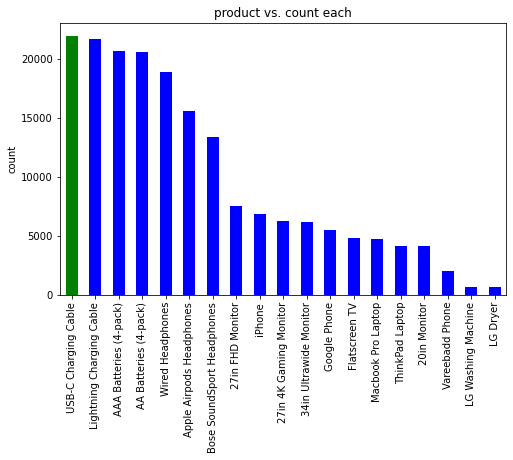

In [37]:
plt.figure(figsize=(8,5))

colors_pro = ['g', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 
              'b', 'b', 'b', 'b']
df_new['Product'].value_counts().plot.bar(color=colors_pro)
plt.ylabel('count')
plt.title('product vs. count each')
plt.show()

### `USB-C Charging Cable is the most product`
